In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import ipdb
from sklearn.isotonic import IsotonicRegression
import seaborn as sns
from scipy.stats import binom

In [68]:
data = np.load('conformal_pfam.npy', allow_pickle=True)
len(data)

1864

In [38]:
data[0]['exact']

[True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [39]:
sum(data[0]['exact'])/len(data[0]['exact'])

0.003

In [40]:
a, b = get_sims_labels(data)

In [42]:
len(a)

1864000

In [65]:
def get_sims_labels(data, partial=False):
    sims = []
    labels = []
    for query in data:
        similarity = query['D_i']
        sims += similarity.tolist()
        if partial:
            labels_to_append = np.logical_or.reduce(query['partial'], axis=1).tolist()
        else:
            labels_to_append = query['exact']
        labels += labels_to_append
    return sims, labels

def get_thresh(data, alpha):
    # conformal risk control
    all_sim_exact = []
    for query in data:
        idx = query['exact']
        similarity = query['D_i']
        sims_to_append = similarity[idx]
        all_sim_exact += list(sims_to_append)
        n = len(all_sim_exact)
        if n > 0:
            lhat = np.quantile(all_sim_exact, np.maximum(alpha-(1-alpha)/n, 0), interpolation='lower')
        else:
            lhat = 0
    return lhat

# Bentkus p value
def bentkus_p_value(r_hat,n,alpha):
    return binom.cdf(np.ceil(n*r_hat),n,alpha/np.e)

def risk(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    return (((1-labels)*(sims >= lam)).sum(axis=1)/(sims >= lam).sum(axis=1)).mean()

def std_loss(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    return ((labels*(sims >= lam)).sum(axis=1)/(sims >= lam).sum(axis=1)).std()

def get_thresh_FDR(data, alpha, delta=0.5, N=5000):
    # FDR control with LTT
    all_sim_exact = []
    labels = np.stack([query['exact'] for query in data], axis=0)
    sims = np.stack([query['D_i'] for query in data], axis=0)
    print(sims.max())
    n = len(labels)
    lambdas = np.linspace(sims.min(),sims.max(),N)
    risks = np.array( [risk(sims, labels, lam) for lam in lambdas] )
    #stds = np.array( [std_loss(sims, labels, lam) for lam in lambdas] )
    pvals = np.array( [bentkus_p_value(r,n,alpha) for r in risks] )
    below = pvals <= delta
    # Pick the smallest lambda such that all lambda above it have p-value below delta
    pvals_satisfy_condition = np.array([ np.all(below[i:])for i in range(N) ])
    lhat = lambdas[np.argmin(pvals_satisfy_condition)]
    print(lhat)
    print(risk(sims, labels, lhat))
    return lhat

def get_isotone_regression(data):
    sims, labels = get_sims_labels(data, partial=True)
    ir = IsotonicRegression(out_of_bounds='clip')
    ir.fit(sims, labels)
    return ir


In [46]:
labels.shape

(1864, 1000)

In [48]:
sims.min()

0.9998091

In [63]:
data[0]['exact']

[True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [64]:
lam = 0.985
# print((labels*(sims >= lam))[0])
print(((1-labels)*(sims >= lam)).sum(axis=1))

[997 971 891 ... 802 997 997]


In [74]:
sum(data[3]['exact']) / len(data[3]['exact'])

0.009

In [76]:
np.argmax([sum(query['exact'])/len(query['exact']) for query in data])

47

In [78]:
sum(data[47]['exact'])

1000

In [75]:
np.median([sum(query['exact'])/len(query['exact']) for query in data])

0.18028648068669526

/home/ron/miniconda3/envs/protein-vec/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


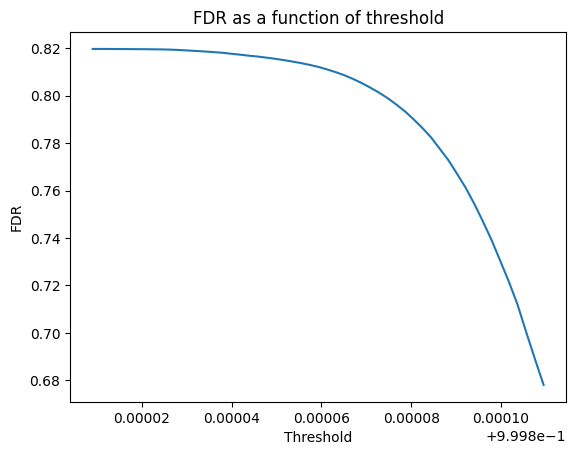

In [70]:
plt.figure()
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['exact'] for query in data], axis=0)
sims = np.stack([query['D_i'] for query in data], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks)
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold')
plt.show()

In [31]:
labels.mean()

0.18028648068669528

In [27]:
get_thresh_FDR(data, 0.5)

1.0000002


/home/ron/miniconda3/envs/protein-vec/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


0.9998090863227844
0.18028648068669526


0.9998090863227844

In [5]:
def validate_lhat(data, lhat):
    total_missed = 0
    total_missed_partial = 0
    total_exact = 0
    total_inexact_identified = 0
    total_identified = 0
    total_partial = 0
    total_partial_identified = 0
    for query in data:
        idx = query['exact']
        idx_partial = np.logical_or.reduce(query['partial'], axis=1)
        sims = query['D_i']
        sims_exact = sims[idx]
        sims_partial = sims[idx_partial]
        total_missed += (sims_exact < lhat).sum()

        # TODO: are there any divisions by zero here?
        total_missed_partial += (sims_partial < lhat).sum()
        total_partial_identified += (sims_partial >= lhat).sum()
        total_partial += len(sims_partial)

        total_exact += len(sims_exact)
        total_inexact_identified += (sims[~np.array(idx)] >= lhat).sum()
        total_identified += (sims >= lhat).sum()
    return total_missed/total_exact, total_inexact_identified/total_identified, total_missed_partial/total_partial, total_partial_identified/total_identified

In [6]:
num_trials = 10
alpha = 0.1
n_calib = 700
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]
    lhat = get_thresh(cal_data, alpha)
    error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')
    

Trial 1: Ex&!Id/Ex: 0.11, In/Id: 0.64, Pa&!Id/Pa: 0.38, Pa&Id/Id: 0.42
Trial 2: Ex&!Id/Ex: 0.12, In/Id: 0.61, Pa&!Id/Pa: 0.39, Pa&Id/Id: 0.44
Trial 3: Ex&!Id/Ex: 0.09, In/Id: 0.65, Pa&!Id/Pa: 0.35, Pa&Id/Id: 0.41
Trial 4: Ex&!Id/Ex: 0.10, In/Id: 0.62, Pa&!Id/Pa: 0.38, Pa&Id/Id: 0.42
Trial 5: Ex&!Id/Ex: 0.10, In/Id: 0.65, Pa&!Id/Pa: 0.37, Pa&Id/Id: 0.42
Trial 6: Ex&!Id/Ex: 0.08, In/Id: 0.65, Pa&!Id/Pa: 0.34, Pa&Id/Id: 0.41
Trial 7: Ex&!Id/Ex: 0.10, In/Id: 0.65, Pa&!Id/Pa: 0.36, Pa&Id/Id: 0.41
Trial 8: Ex&!Id/Ex: 0.11, In/Id: 0.63, Pa&!Id/Pa: 0.38, Pa&Id/Id: 0.42
Trial 9: Ex&!Id/Ex: 0.09, In/Id: 0.65, Pa&!Id/Pa: 0.34, Pa&Id/Id: 0.43
Trial 10: Ex&!Id/Ex: 0.09, In/Id: 0.64, Pa&!Id/Pa: 0.34, Pa&Id/Id: 0.42


(array([  135.,   427.,   521.,  2500.,  7985., 19833., 40692., 73351.,
        55819., 17175.]),
 array([0.99981248, 0.99983126, 0.99985003, 0.99986881, 0.99988759,
        0.99990636, 0.99992514, 0.99994391, 0.99996269, 0.99998146,
        1.00000024]),
 <BarContainer object of 10 artists>)

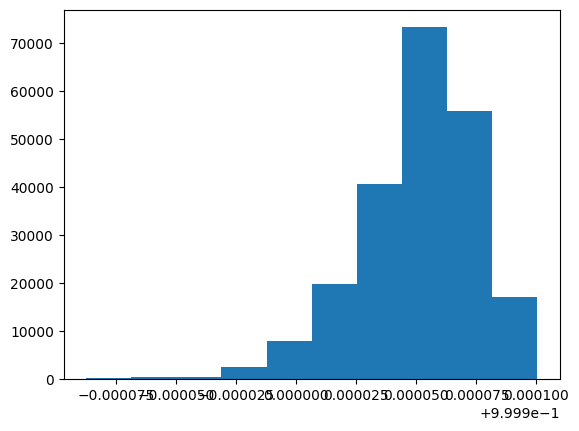

In [7]:
sims, labels = get_sims_labels(test_data, partial=False)
plt.hist(np.array(sims)[np.array(labels).astype(bool)])

(array([  2069.,  12248.,  38818., 133427., 247517., 230022., 159742.,
         97177.,  23181.,   1361.]),
 array([0.99980909, 0.99982811, 0.99984714, 0.99986616, 0.99988519,
        0.99990422, 0.99992324, 0.99994227, 0.99996129, 0.99998032,
        0.99999934]),
 <BarContainer object of 10 artists>)

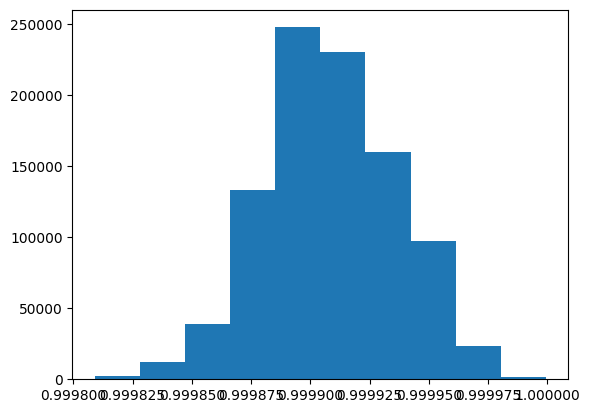

In [8]:
plt.hist(np.array(sims)[~np.array(labels).astype(bool)])

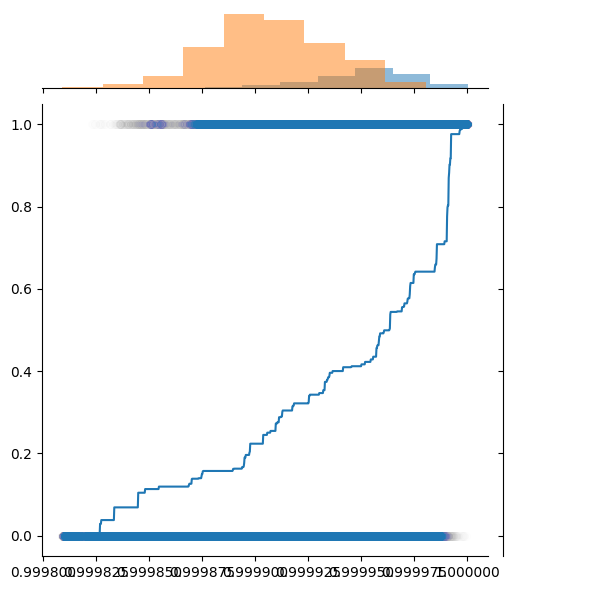

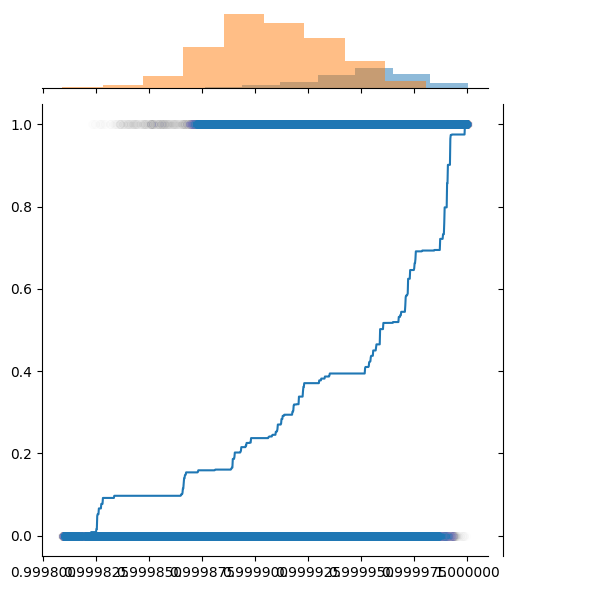

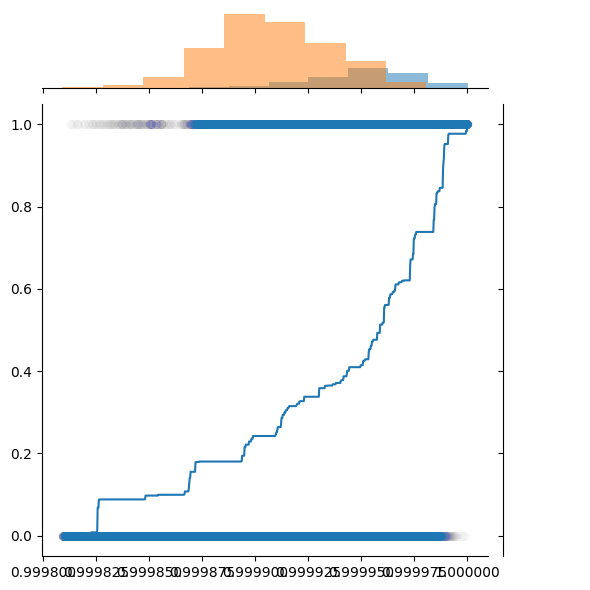

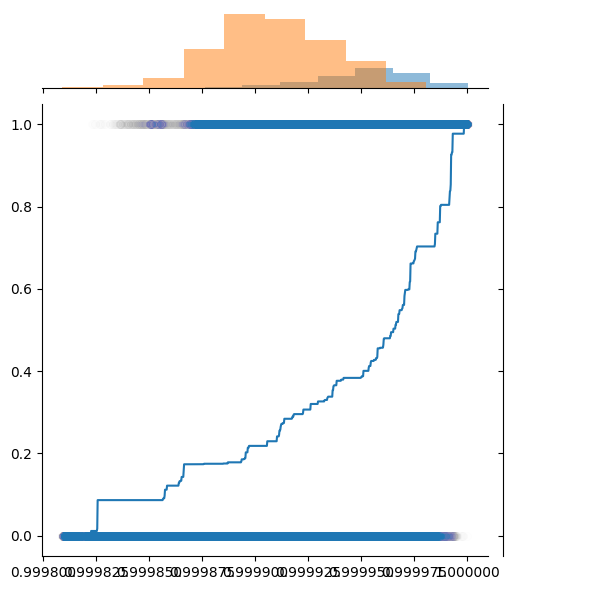

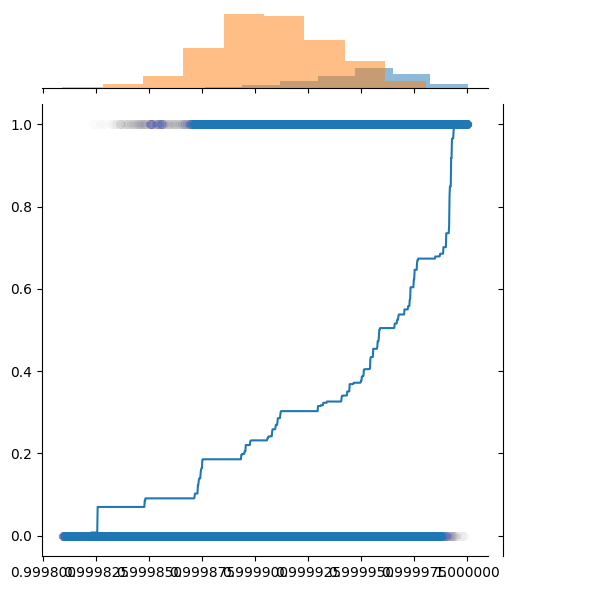

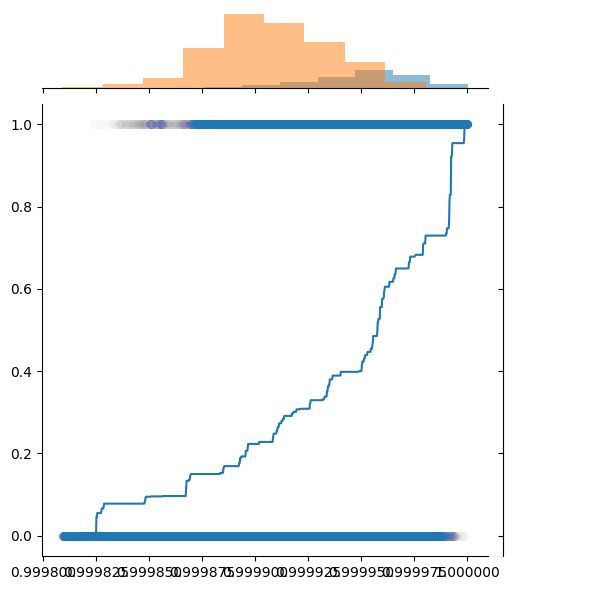

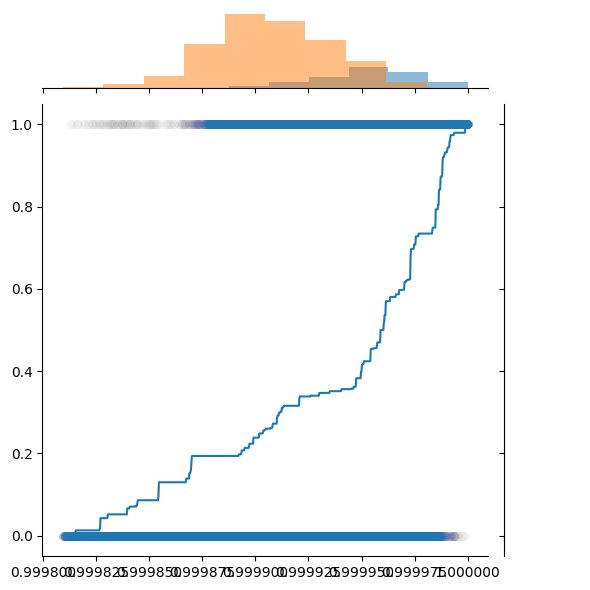

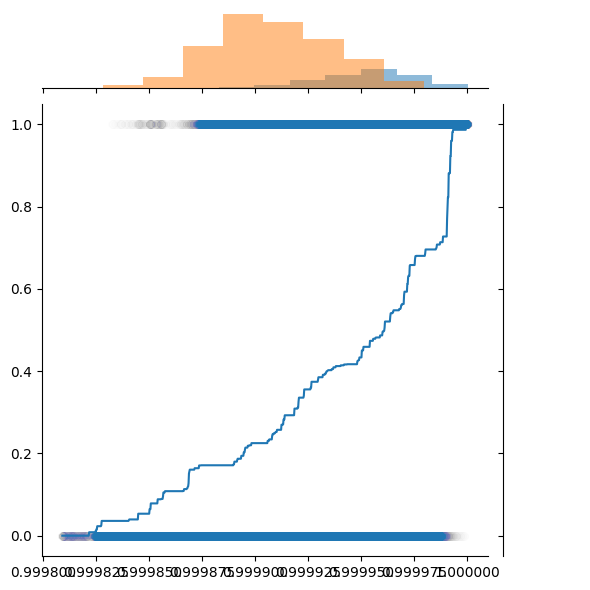

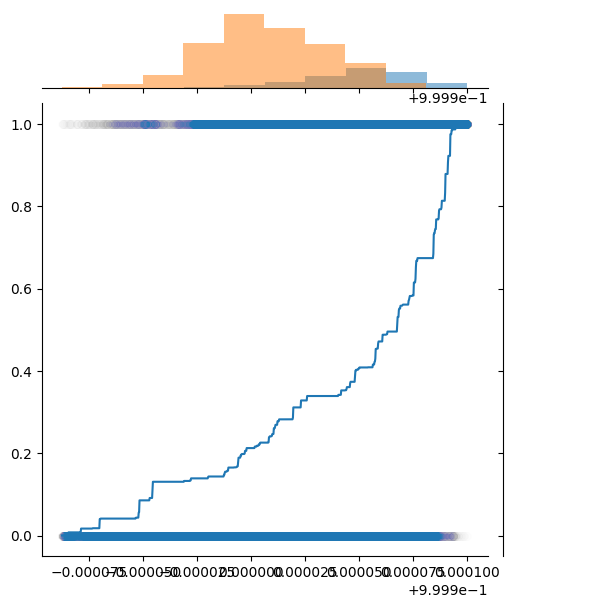

KeyboardInterrupt: 

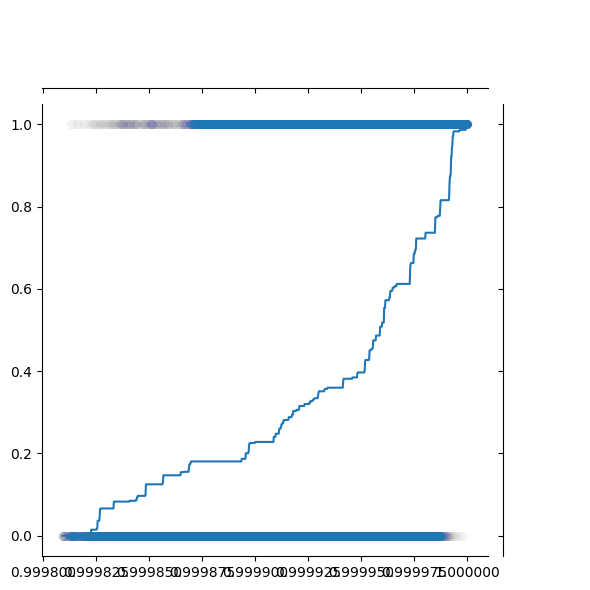

In [9]:
num_trials = 10
n_calib = 700
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]
    ir = get_isotone_regression(cal_data)
    sims, labels = get_sims_labels(test_data, partial=False)
    preds = ir.predict(sims)
    g = sns.JointGrid()
    g.ax_joint.scatter(sims, labels, alpha=0.003)
    x = np.linspace(min(sims), max(sims), 1000)
    phats = ir.predict(x)
    g.ax_joint.plot(x, phats)
    g.ax_marg_x.hist(np.array(sims)[np.array(labels)], label='1', alpha=0.5)
    g.ax_marg_x.hist(np.array(sims)[~np.array(labels)], label='0', alpha=0.5)
    plt.show()
    ##print()
#
    #plt.figure()
    #sim_bins = np.linspace(min(sims), max(sims), 100)
    #plt.hist(np.array(sims)[np.array(labels)], bins=sim_bins, alpha=0.5, label='1')
    #plt.hist(np.array(sims)[~np.array(labels)], bins=sim_bins, alpha=0.5, label='0')
    #plt.legend()

    

In [ ]:
# Implement isotonic regression
ir = IsotonicRegression()

# Fit the model


In [ ]:
data[0].keys()

dict_keys(['meta', 'meta_query', 'exact', 'partial', 'D_i'])

'meta': these are the Pfam (protein family) entries from the lookup dataset. Len 1000

'meta_query': this is the Pfam of the query protein (there is only one per dict). Some proteins will have multiple pfams associated with them

'exact': True if the meta_query Pfam is in any of the Pfams for meta. Len 1000

'partial': In the case where a query protein is assigned multiple Pfams, we seek to see if we get partial hits for each of these query protein Pfams. Shape 1000 x # of Pfams for query protein

D_i: These are the similarities assigned by our model for each query to its top 1000 lookup pairs (len 1000 as well)

In [ ]:
data[0]['exact'][0:5]

[True, True, True, False, False]

In [ ]:
idx = data[0]['exact'][0:5]
sims = data[0]['D_i'][0:5]

In [ ]:
sims

array([0.99997175, 0.9999694 , 0.99996597, 0.99992836, 0.9999259 ],
      dtype=float32)

In [ ]:
max(sims[idx])

0.99997175

In [ ]:
max_sim_exact = []
for i in range(len(data[0]['exact'])):
    idx = data[0]['exact'][i]
    sims = data[0]['D_i'][i]

    max_sim = sims[idx]
    max_sim_exact.append(max(sims[idx]))

ValueError: max() arg is an empty sequence

In [ ]:
data[0]

In [ ]:
    # for lookup in query['exact']:
    #     sims = query['D_i']
    #     all_sim_exact.append(sims[lookup])

# for i in range(len(data['exact'])):
#     idx = data['exact'][i]
#     sims = data['D_i'][i]
#     sims_to_append = sims[idx]
#     # if len(sims_to_append) == 0:
#     #     sims_to_append = np.nan
#     all_sim_exact.append(sims_to_append)

In [ ]:
all_sim_exact

[0.99997175,
 0.9999694,
 0.99996597,
 0.9999945,
 0.99999416,
 0.99999416,
 0.9999935,
 0.9999935,
 0.99998975,
 0.9999794,
 0.99997807,
 0.9999763,
 0.99997497,
 0.9999745,
 0.9999744,
 0.9999739,
 0.9999739,
 0.9999737,
 0.9999734,
 0.9999733,
 0.99997115,
 0.9999711,
 0.999971,
 0.9999703,
 0.9999702,
 0.9999701,
 0.99996996,
 0.99996966,
 0.999969,
 0.99996805,
 0.9999672,
 0.9999656,
 0.9999926,
 0.9999919,
 0.9999914,
 0.9999902,
 0.99998987,
 0.99998903,
 0.9999883,
 0.99998814,
 0.9999869,
 0.9999869,
 0.9999864,
 0.99998593,
 0.9999856,
 0.99998546,
 0.99998516,
 0.9999847,
 0.99998444,
 0.9999838,
 0.9999838,
 0.9999837,
 0.9999836,
 0.99998325,
 0.99998283,
 0.99998224,
 0.9999821,
 0.9999818,
 0.9999812,
 0.9999808,
 0.9999807,
 0.9999803,
 0.9999802,
 0.9999801,
 0.99997973,
 0.999979,
 0.9999788,
 0.99997824,
 0.9999781,
 0.9999777,
 0.99997735,
 0.99997723,
 0.999977,
 0.99997663,
 0.9999748,
 0.99997365,
 0.99997306,
 0.99997306,
 0.99997246,
 0.9999704,
 0.9999696,
 0

In [ ]:
lhat

0.99991775